In [1]:
import numpy as np

raw_data = np.genfromtxt('/home/verlo/dev_ws/DeepLearning/data/x09.txt', skip_header=36)
raw_data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

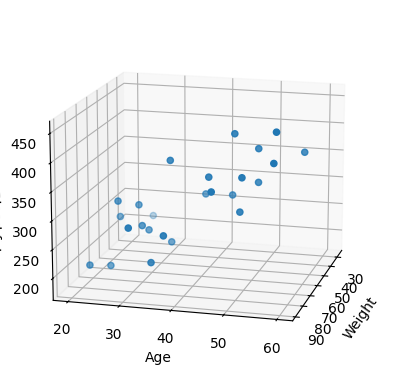

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

xs = np.array(raw_data[:,2], dtype=np.float32)
ys = np.array(raw_data[:,3], dtype=np.float32)
zs = np.array(raw_data[:,4], dtype=np.float32)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

In [3]:
x_data = np.array(raw_data[:,2:4], dtype=np.float32)
y_data = np.array(raw_data[:,4], dtype=np.float32)

y_data = y_data.reshape((25,1))

In [6]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2, )),
])

model.compile(optimizer='rmsprop', loss='mse')

/home/verlo/venv/Tensorflow_venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-10 10:19:17.702377: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-10 10:19:17.806784: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/s

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
hist = model.fit(x_data, y_data, epochs=5000)

Epoch 1/5000


I0000 00:00:1715303994.061033   10810 service.cc:145] XLA service 0x728a60006870 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715303994.061063   10810 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2024-05-10 10:19:54.099313: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-10 10:19:54.156110: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step - loss: 135569.0625
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 135314.3594
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 135129.8438
Epoch 4/5000


I0000 00:00:1715303994.386224   10810 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 134975.4219
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 134838.4844
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 134713.0625
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 134595.9219
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 134484.9375
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 134378.7500
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 134276.4531
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 134177.2500
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 134080.6875
Epoch 13/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 133986.3125
Epoch 14/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 133893.7344
Epoch 15/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 133802.7500
Epoch 16/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 133713.1094
Epoch 17/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 133624.6719
Epoch 18/5

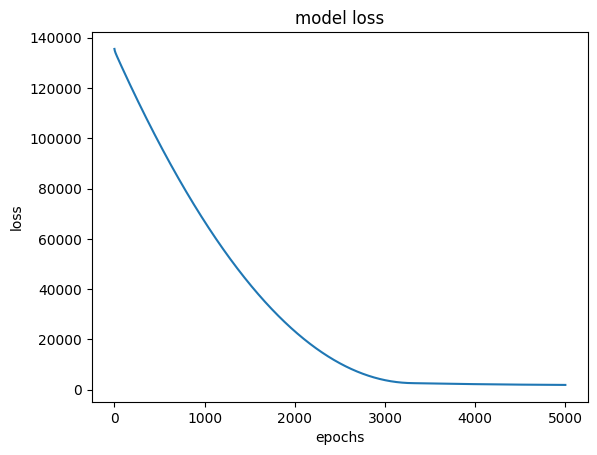

In [9]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [10]:
model.predict(np.array([100,44]).reshape(1,2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[380.95514]], dtype=float32)

In [11]:
model.predict(np.array([60,25]).reshape(1,2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[223.46854]], dtype=float32)

In [12]:
W_, b_ = model.get_weights()
print('Weight is : ', W_)
print('bias is :', b_)

Weight is :  [[1.5317323]
 [5.064069 ]]
bias is : [4.9628778]


In [13]:
x = np.linspace(20, 100, 50).reshape(50,1)
y = np.linspace(10, 70, 50).reshape(50,1)

X = np.concatenate((x,y), axis=1)
Z = np.matmul(X, W_) + b_

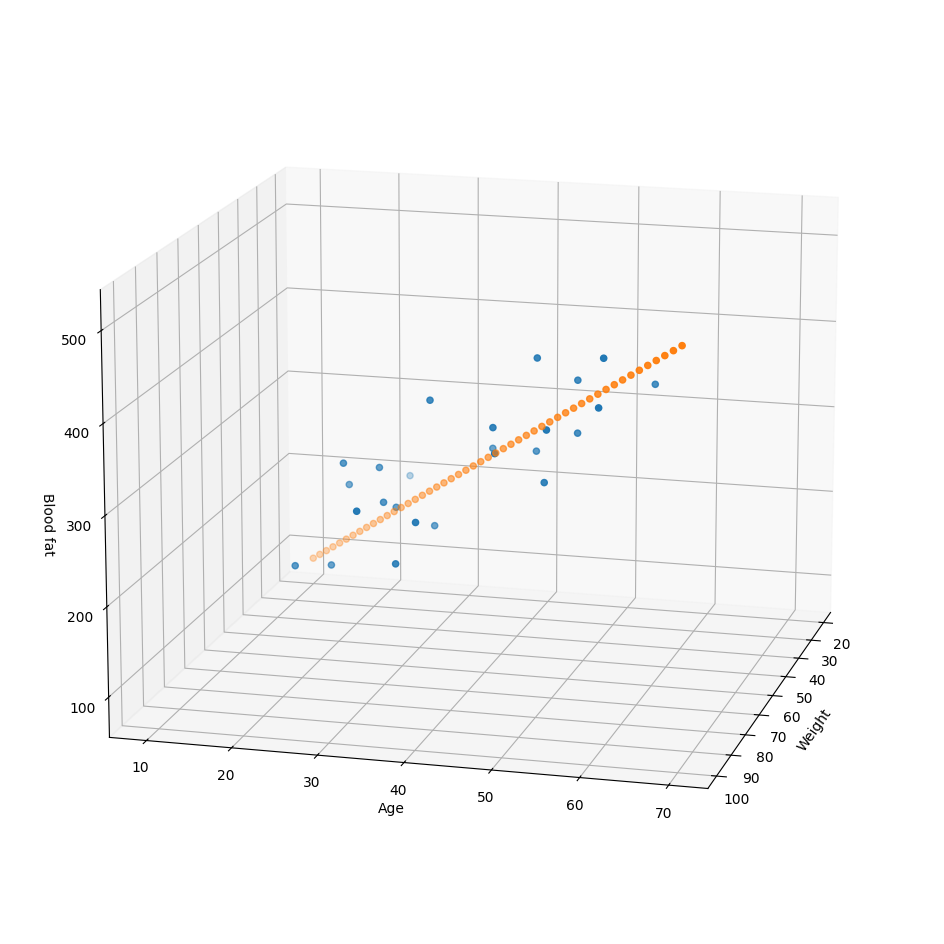

In [14]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)
ax.scatter(x, y , Z)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15,15)
plt.show()

In [15]:
import numpy as np

X = np.array([[0, 0],
              [1, 0],
              [0, 1],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/home/verlo/venv/Tensorflow_venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss="mse")

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
hist = model.fit(X, y, epochs=5000, batch_size=1)

Epoch 1/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3032  
Epoch 2/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2987 
Epoch 3/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2229 
Epoch 4/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2403 
Epoch 5/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2644 
Epoch 6/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2630 
Epoch 7/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2281 
Epoch 8/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2513 
Epoch 9/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2706 
Epoch 10/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2647 
Epoch 11/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2677  
Epoch 12/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2475 
Epoch 13/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2697 
Epoch 14/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2620 
Epoch 15/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2509 
Ep

In [23]:
model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


array([[0.0620511 ],
       [0.9430716 ],
       [0.9430768 ],
       [0.06120843]], dtype=float32)

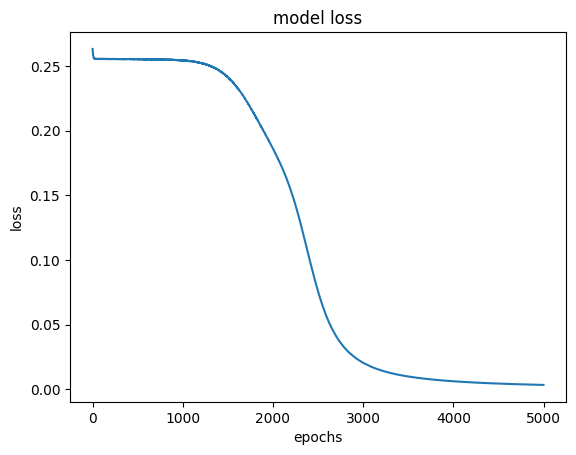

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [26]:
for w in model.weights:
    print('---')
    print(w)

---
<KerasVariable shape=(2, 2), dtype=float32, path=sequential_1/dense_1/kernel>
---
<KerasVariable shape=(2,), dtype=float32, path=sequential_1/dense_1/bias>
---
<KerasVariable shape=(2, 1), dtype=float32, path=sequential_1/dense_2/kernel>
---
<KerasVariable shape=(1,), dtype=float32, path=sequential_1/dense_2/bias>


In [27]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [28]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit(y.reshape(len(y), 1))

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [32]:
enc.categories_

[array([0, 1, 2])]

In [33]:
y_onehot = enc.transform(y.reshape(len(y), 1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=13)

In [35]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4, ), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

/home/verlo/venv/Tensorflow_venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,371 (9.26 KB)

 Trainable params: 2,371 (9.26 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 302ms/step - accuracy: 0.0294 - loss: 1.2053
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4667 - loss: 1.0709
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5506 - loss: 0.9604 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7906 - loss: 0.8899 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7748 - loss: 0.8230 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7377 - loss: 0.7970 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8496 - loss: 0.7454 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8942 - loss: 0.6956 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8869 - loss: 0.6516
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8804 - loss: 0.6203 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8869 - loss: 0.5852
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9213 - l

In [38]:
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - 413ms/step - accuracy: 1.0000 - loss: 0.0790


[0.07896512001752853, 1.0]

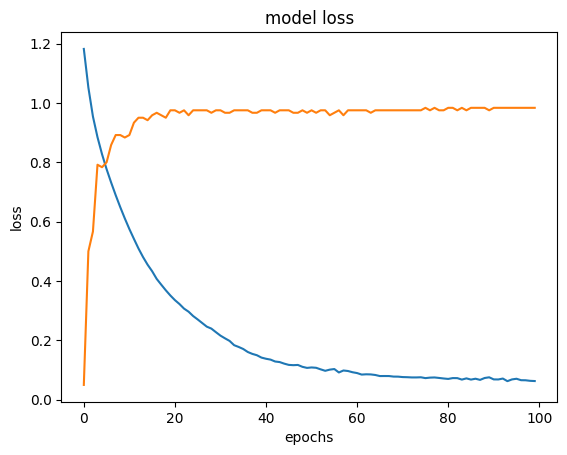

In [39]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()